# XAI - Group activities - Activity 4

Group 1:
<ul>
<li>Lidia Abad Azcutia</li>
<li>Sergio Arroni del Riego</li>
<li>David González Fernández</li>
</ul>

In [13]:
# @title Imports
from sklearn.ensemble import GradientBoostingClassifier
from ucimlrepo import fetch_ucirepo
import shap
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from lime import lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

seed = 0
random.seed(seed)
np.random.seed(seed)

In [14]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets

In [46]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [15]:
print(X.shape)
print(y.shape)
print(X.columns)

(4601, 57)
(4601, 1)
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'wo

In [16]:
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [18]:
def get_model():
    return make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=seed))

In [19]:
# Build a GradientBoostingClassifier model
pipa = get_model()
pipa.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=0))])

In [20]:
# Make predictions on the test set
y_pred = pipa.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [22]:
# SHAP
explainer = shap.TreeExplainer(pipa.named_steps['gradientboostingclassifier'])
shap_values = explainer.shap_values(X_test)

In [23]:
# LIME
explainer_lime = lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X_train.columns, class_names=["0", "1"]
)
lime_exp = explainer_lime.explain_instance(X_test.iloc[0].values, pipa.predict_proba, num_features=len(X_train.columns))

X does not have valid feature names, but StandardScaler was fitted with feature names


In [24]:
# Print SHAP values for the first instance in the test set
print("SHAP Values:")
print(shap_values[0])

SHAP Values:
[-2.01985312e-04 -2.67542098e-04  3.21023616e-03 -1.40160741e-04
  9.71479698e-02 -2.56483133e-02  1.06271505e+00 -1.43780336e-02
 -2.94578088e-05  5.00530873e-02 -1.11529576e-02  1.23421236e-02
  6.88363917e-04 -6.40951066e-03 -3.61803950e-02  1.06965848e-01
 -2.36914765e-01 -3.77128720e-04 -1.75827836e-02 -3.40490175e-02
 -4.55004726e-02 -1.55779491e-02  2.72513236e-01  3.02210283e-01
 -1.27499624e+00 -6.05001196e-02 -1.87004762e+00 -3.56408023e-02
  0.00000000e+00  6.54449896e-04  0.00000000e+00  0.00000000e+00
  2.68287589e-04  0.00000000e+00  0.00000000e+00 -1.43726300e-03
 -3.06523788e-01  0.00000000e+00  4.22944341e-03  0.00000000e+00
  0.00000000e+00  3.39137001e-02  0.00000000e+00 -2.04719063e-02
  7.03684654e-03 -1.34994176e+00  0.00000000e+00  1.04965417e-02
 -5.83489640e-03  1.67319717e-02  5.90307743e-05  1.02967274e+00
  8.18212479e-01  1.63185296e-05  2.77847906e-01 -4.27229211e-02
  7.71821501e-01]


In [25]:
# Print LIME explanation for the first instance in the test set
print("\nLIME Explanation:")
lime_exp.show_in_notebook()


LIME Explanation:


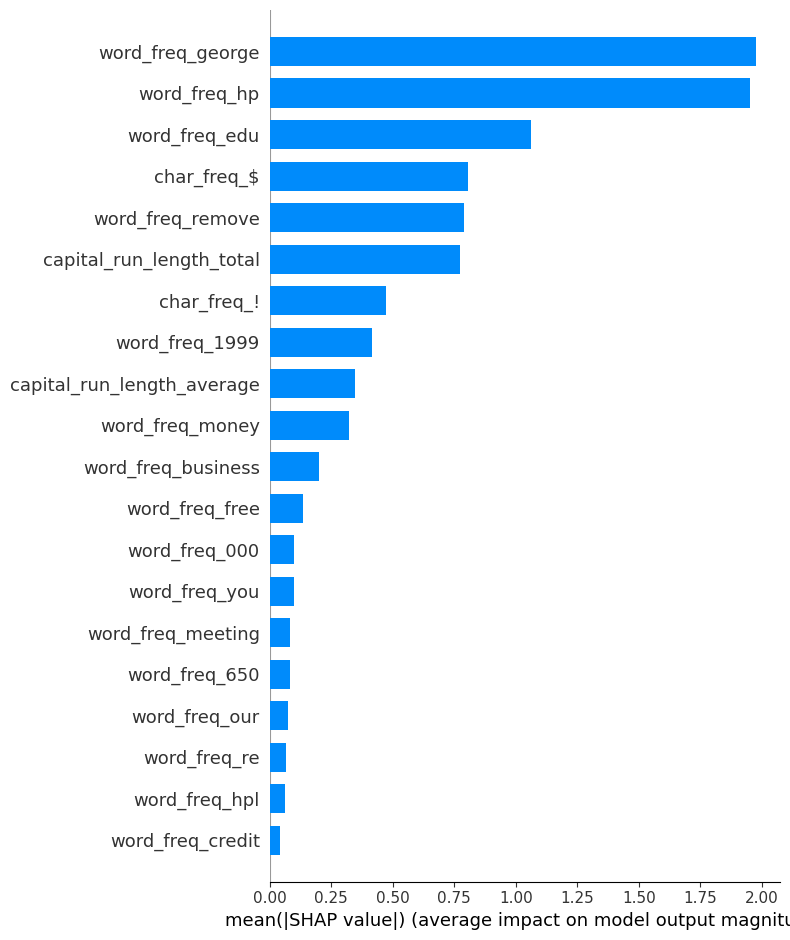

In [26]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")
plt.show()

In [27]:
feature_dict = {index: feature for index, feature in enumerate(X.columns)}
print(feature_dict)

{0: 'word_freq_make', 1: 'word_freq_address', 2: 'word_freq_all', 3: 'word_freq_3d', 4: 'word_freq_our', 5: 'word_freq_over', 6: 'word_freq_remove', 7: 'word_freq_internet', 8: 'word_freq_order', 9: 'word_freq_mail', 10: 'word_freq_receive', 11: 'word_freq_will', 12: 'word_freq_people', 13: 'word_freq_report', 14: 'word_freq_addresses', 15: 'word_freq_free', 16: 'word_freq_business', 17: 'word_freq_email', 18: 'word_freq_you', 19: 'word_freq_credit', 20: 'word_freq_your', 21: 'word_freq_font', 22: 'word_freq_000', 23: 'word_freq_money', 24: 'word_freq_hp', 25: 'word_freq_hpl', 26: 'word_freq_george', 27: 'word_freq_650', 28: 'word_freq_lab', 29: 'word_freq_labs', 30: 'word_freq_telnet', 31: 'word_freq_857', 32: 'word_freq_data', 33: 'word_freq_415', 34: 'word_freq_85', 35: 'word_freq_technology', 36: 'word_freq_1999', 37: 'word_freq_parts', 38: 'word_freq_pm', 39: 'word_freq_direct', 40: 'word_freq_cs', 41: 'word_freq_meeting', 42: 'word_freq_original', 43: 'word_freq_project', 44: 'wo

In [28]:
def calculate_feature_insertion_metrics(X_test, y_test, feature_order, method="shap"):
    feature_insertion = {}
    X_subset = pd.DataFrame()

    for ele in feature_order:
        feature = feature_dict[ele]
        print(f"La variable insertada es: {feature}")

        if method == "shap":
            X_subset = pd.concat([X_subset, X_test[feature]], axis=1, ignore_index=True)
        elif method == "lime":
            X_subset = pd.concat([X_subset, X_test[feature]], axis=1, ignore_index=True)
        else:
            raise ValueError("Invalid method. Use 'shap' or 'lime'.")
        
        model_insertion = get_model()
        model_insertion.fit(X_subset, y_test.values.ravel())
        y_pred = model_insertion.predict(X_subset)

        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)  # Calcular AUC
        
        feature_insertion[feature] = {'accuracy': accuracy, 'auc': auc, 'feature_order': ele}

    return feature_insertion


In [29]:
# Get feature importance order from SHAP values
shap_feature_order = np.argsort(np.abs(np.mean(shap_values, axis=0).astype(float)))[::-1]

# Calculate accuracies for feature insertion using SHAP
print("SHAP")
feature_insertion_shap = calculate_feature_insertion_metrics(X_test, y_test, shap_feature_order, method='shap')

SHAP
La variable insertada es: word_freq_george
La variable insertada es: word_freq_hp
La variable insertada es: word_freq_edu
La variable insertada es: char_freq_$
La variable insertada es: word_freq_remove
La variable insertada es: capital_run_length_total
La variable insertada es: char_freq_!
La variable insertada es: word_freq_1999
La variable insertada es: capital_run_length_average
La variable insertada es: word_freq_money
La variable insertada es: word_freq_business
La variable insertada es: word_freq_free
La variable insertada es: word_freq_you
La variable insertada es: word_freq_000
La variable insertada es: word_freq_our
La variable insertada es: word_freq_hpl
La variable insertada es: word_freq_credit
La variable insertada es: word_freq_meeting
La variable insertada es: word_freq_project
La variable insertada es: word_freq_over
La variable insertada es: word_freq_will
La variable insertada es: word_freq_re
La variable insertada es: word_freq_650
La variable insertada es: wor

In [30]:
# Get feature importance order from LIME values
lime_feature_order = np.argsort(np.abs(np.array(lime_exp.as_list())[:, 1].astype(float)))[::-1]

# Calculate accuracies for feature insertion using LIME
print("LIME")
feature_insertion_lime = calculate_feature_insertion_metrics(X_test, y_test, lime_feature_order, method='lime')

LIME
La variable insertada es: word_freq_make
La variable insertada es: word_freq_address
La variable insertada es: word_freq_all
La variable insertada es: word_freq_3d
La variable insertada es: word_freq_our
La variable insertada es: word_freq_over
La variable insertada es: word_freq_remove
La variable insertada es: word_freq_internet
La variable insertada es: word_freq_order
La variable insertada es: word_freq_mail
La variable insertada es: word_freq_receive
La variable insertada es: word_freq_will
La variable insertada es: word_freq_people
La variable insertada es: word_freq_report
La variable insertada es: word_freq_addresses
La variable insertada es: word_freq_free
La variable insertada es: word_freq_business
La variable insertada es: word_freq_email
La variable insertada es: word_freq_you
La variable insertada es: word_freq_credit
La variable insertada es: word_freq_your
La variable insertada es: word_freq_font
La variable insertada es: word_freq_000
La variable insertada es: wor

In [31]:
# Extraer las características y métricas
features_shap = list(feature_insertion_shap.keys())

# Obtener los índices de las características en X_test
feature_indices_shap = [str(X_test.columns.get_loc(feature)) for feature in features_shap]

accuracies_shap = [result["accuracy"] for result in feature_insertion_shap.values()]
auc_scores_shap = [result["auc"] for result in feature_insertion_shap.values()]
features_list_shap = [result["feature_order"] for result in feature_insertion_shap.values()]

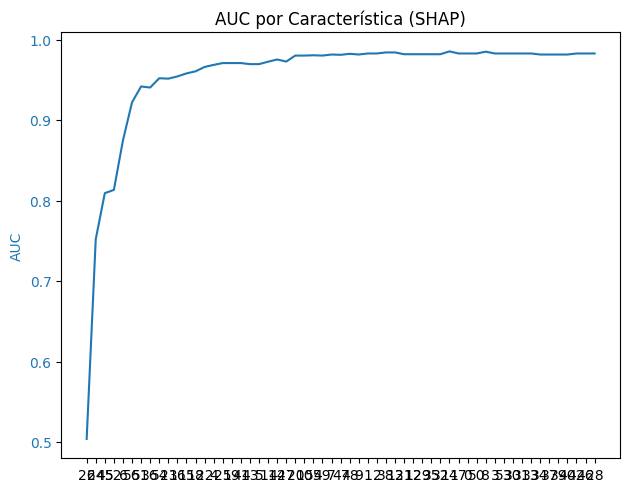

In [32]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('AUC', color=color)  
ax1.plot(feature_indices_shap, auc_scores_shap, color=color)  # Use feature_indices instead of features
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (SHAP)")
plt.show()

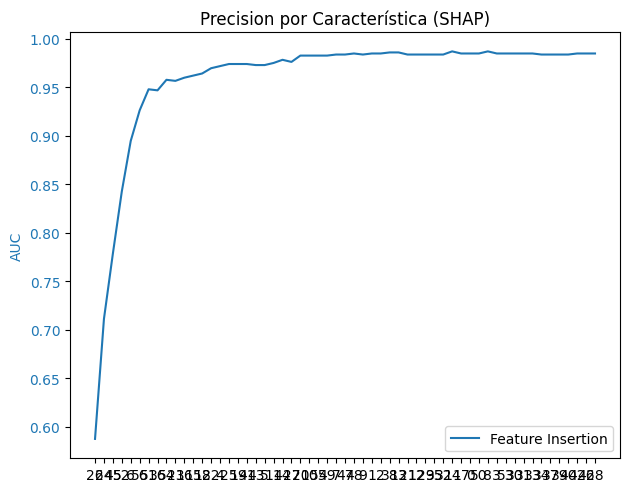

In [33]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('AUC', color=color)  
ax1.plot(feature_indices_shap, accuracies_shap, color=color)  # Use feature_indices instead of features
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Precision por Característica (SHAP)")
plt.legend(['Feature Insertion'])
plt.show()

In [34]:
# Extraer las características y métricas
features_lime = list(feature_insertion_lime.keys())

# Obtener los índices de las características en X_test
feature_indices_lime = [str(X_test.columns.get_loc(feature)) for feature in features_lime]

accuracies_lime = [result["accuracy"] for result in feature_insertion_lime.values()]
auc_scores_lime = [result["auc"] for result in feature_insertion_lime.values()]
features_list_lime = [result["feature_order"] for result in feature_insertion_lime.values()]

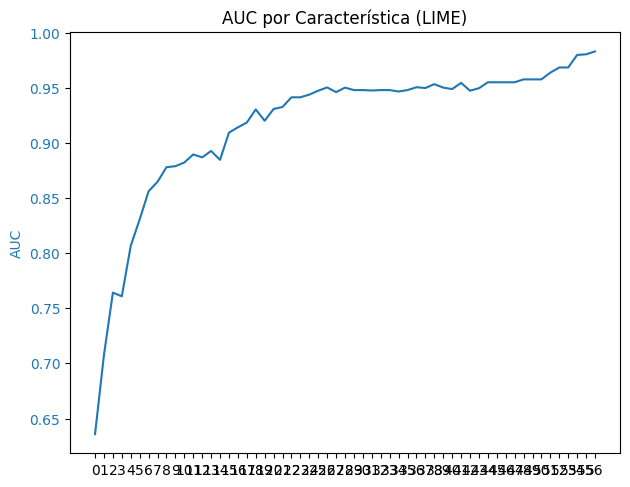

In [35]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('AUC', color=color)  
ax1.plot(feature_indices_lime, auc_scores_lime, color=color)  # Use feature_indices instead of features
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (LIME)")
plt.show()

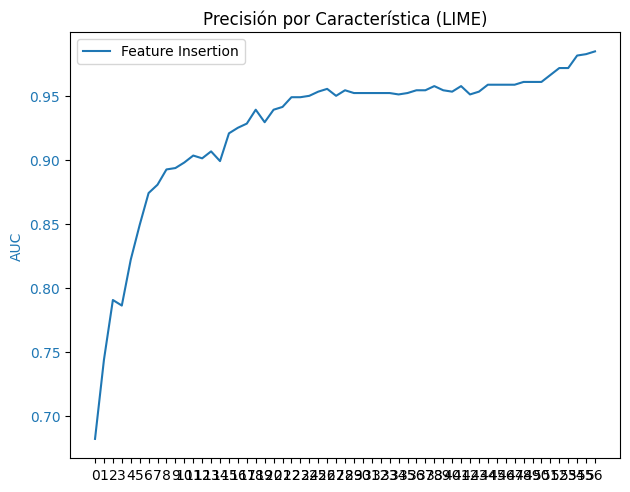

In [36]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('AUC', color=color)  
ax1.plot(feature_indices_lime, accuracies_lime, color=color)  # Use feature_indices instead of features
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Precisión por Característica (LIME)")
plt.legend(['Feature Insertion'])
plt.show()

In [37]:
random_feature_selections_shap = np.random.permutation(list(map(int, feature_indices_shap)))
print(random_feature_selections_shap)
# Resultados para métodos SHAP y LIME
print("SHAP")
shap_feature_insertion_random = calculate_feature_insertion_metrics(X_test, y_test, random_feature_selections_shap, method='shap')

[49 54 30 20 38  6 25  7 53 39 22  9  0 27 31 56 26  3 17 33 50 41 15 44
 19 55  8 29 48 52 24  5 43  4 14 23 10 42 12  2  1 45 46 37 35 40 16 32
 51 18 13 28 21 11 47 36 34]
SHAP
La variable insertada es: char_freq_(
La variable insertada es: capital_run_length_average
La variable insertada es: word_freq_telnet
La variable insertada es: word_freq_your
La variable insertada es: word_freq_pm
La variable insertada es: word_freq_remove
La variable insertada es: word_freq_hpl
La variable insertada es: word_freq_internet
La variable insertada es: char_freq_#
La variable insertada es: word_freq_direct
La variable insertada es: word_freq_000
La variable insertada es: word_freq_mail
La variable insertada es: word_freq_make
La variable insertada es: word_freq_650
La variable insertada es: word_freq_857
La variable insertada es: capital_run_length_total
La variable insertada es: word_freq_george
La variable insertada es: word_freq_3d
La variable insertada es: word_freq_email
La variable insertad

In [38]:
random_feature_selections_lime = np.random.permutation(list(map(int, feature_indices_lime)))
print(random_feature_selections_lime)

print("LIME")
lime_feature_insertion_random = calculate_feature_insertion_metrics(X_test, y_test, random_feature_selections_lime, method='lime')

[17 56 41 43 19 15 44 13  3 21 42 47 34 24  1 32 51 48 53 10 49 23  8  6
 31 35 12 50 22 37 16 55 26  5 54 38 36 28 33 14 40 27 45 46 39 29  2 52
  4  0  7 20 11  9 18 30 25]
LIME
La variable insertada es: word_freq_email
La variable insertada es: capital_run_length_total
La variable insertada es: word_freq_meeting
La variable insertada es: word_freq_project
La variable insertada es: word_freq_credit
La variable insertada es: word_freq_free
La variable insertada es: word_freq_re
La variable insertada es: word_freq_report
La variable insertada es: word_freq_3d
La variable insertada es: word_freq_font
La variable insertada es: word_freq_original
La variable insertada es: word_freq_conference
La variable insertada es: word_freq_85
La variable insertada es: word_freq_hp
La variable insertada es: word_freq_address
La variable insertada es: word_freq_data
La variable insertada es: char_freq_!
La variable insertada es: char_freq_;
La variable insertada es: char_freq_#
La variable insertada es

In [39]:
# Extraer las características y métricas
features_random_lime = list(feature_insertion_lime.keys())

# Obtener los índices de las características en X_test
feature_indices_random_lime = [str(X_test.columns.get_loc(feature)) for feature in features_random_lime]

accuracies_lime_random = [result["accuracy"] for result in lime_feature_insertion_random.values()]
auc_scores_lime_random = [result["auc"] for result in lime_feature_insertion_random.values()]
features_list_lime_random = [result["feature_order"] for result in lime_feature_insertion_random.values()]

In [40]:
# Extraer las características y métricas
features_random_shap = list(feature_insertion_shap.keys())

# Obtener los índices de las características en X_test
feature_indices_random_shap = [str(X_test.columns.get_loc(feature)) for feature in features_random_shap]

accuracies_shap_random = [result["accuracy"] for result in shap_feature_insertion_random.values()]
auc_scores_shap_random = [result["auc"] for result in shap_feature_insertion_random.values()]
features_list_shap_random = [result["feature_order"] for result in shap_feature_insertion_random.values()]

In [41]:
print(f"AUC: {len(auc_scores_lime_random)}")
print(f"Accuracy: {len(auc_scores_lime)}")

AUC: 57
Accuracy: 57


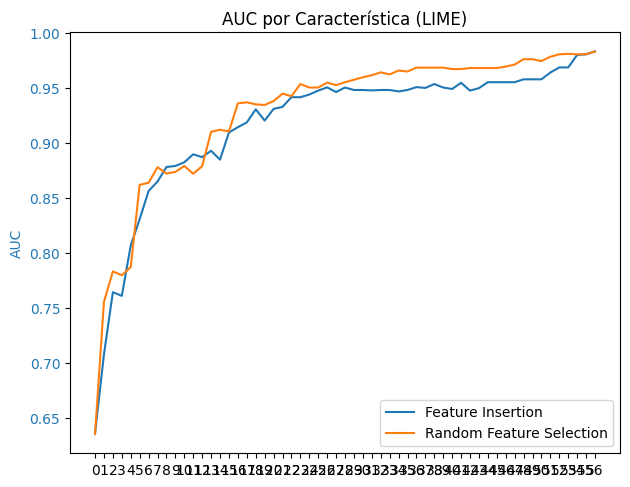

In [42]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('AUC', color=color)  
ax1.plot(feature_indices_lime, auc_scores_lime, color=color)  # Use feature_indices instead of features
ax1.plot(feature_indices_lime, auc_scores_lime_random, color='tab:orange')  # Plot random feature selection AUC scores
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (LIME)")
plt.legend(['Feature Insertion', 'Random Feature Selection'])
plt.show()

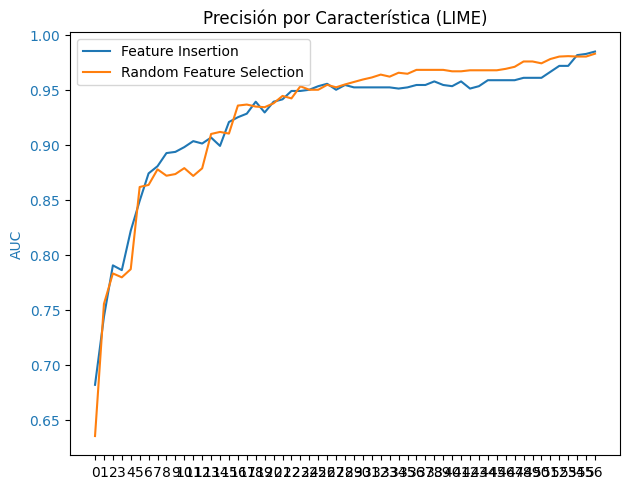

In [43]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('AUC', color=color)  
ax1.plot(feature_indices_lime, accuracies_lime, color=color)  # Use feature_indices instead of features
ax1.plot(feature_indices_lime, auc_scores_lime_random, color='tab:orange')  # Plot random feature selection AUC scores
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Precisión por Característica (LIME)")
plt.legend(['Feature Insertion', 'Random Feature Selection'])
plt.show()

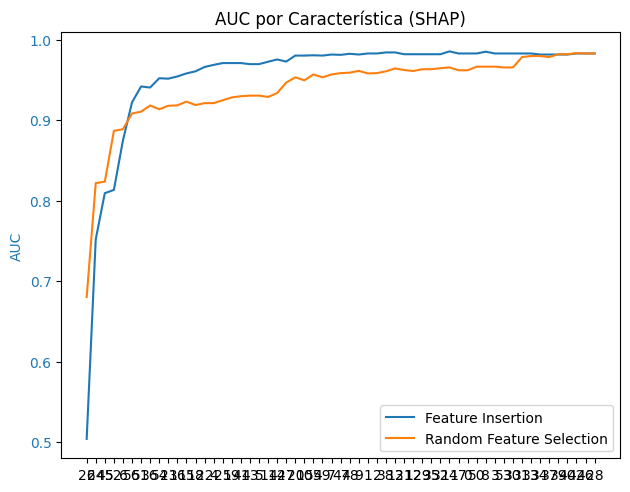

In [44]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('AUC', color=color)  
ax1.plot(feature_indices_shap, auc_scores_shap, color=color)  # Use feature_indices instead of features
ax1.plot(feature_indices_shap, auc_scores_shap_random, color='tab:orange')  # Plot random feature selection AUC scores
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (SHAP)")
plt.legend(['Feature Insertion', 'Random Feature Selection'])
plt.show()

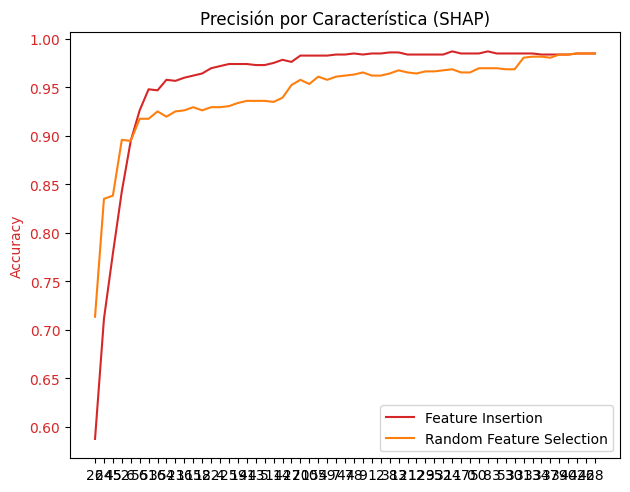

In [45]:
# Crear gráficos
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('Accuracy', color=color)  
ax1.plot(feature_indices_shap, accuracies_shap, color=color)  # Use feature_indices instead of features
ax1.plot(feature_indices_shap, accuracies_shap_random, color='tab:orange')  # Plot random feature selection accuracies
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Precisión por Característica (SHAP)")
plt.legend(['Feature Insertion', 'Random Feature Selection'])
plt.show()